**Tugas Praktikum**

1. Gunakan data 'Mall_Customers.csv'

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Memuat data dari 'Mall_Customers.csv'
data = pd.read_csv('dataset/Mall_Customers.csv')

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [3]:
# Pilih fitur yang ingin digunakan untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
# Menentukan jumlah kluster yang diinginkan
num_clusters = 3  # Mengganti nilai menjadi 3

In [5]:
# Membuat model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

In [6]:
# Melatih model K-Means
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [7]:
# Menambahkan label kluster ke data
data['Cluster'] = kmeans.labels_

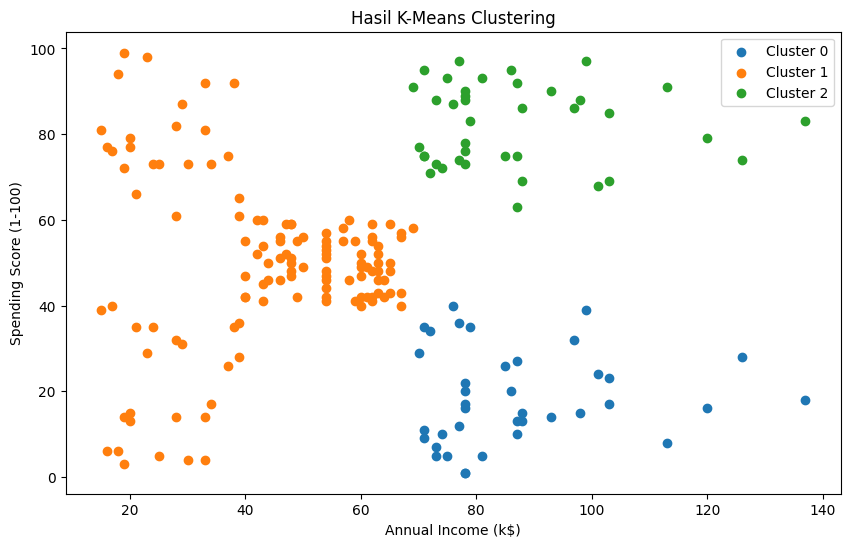

In [8]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.show()

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [9]:
# Menghilangkan kolom yang tidak diperlukan
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# Menyimpan inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
for k in range(1, 11):  # Coba jumlah kluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

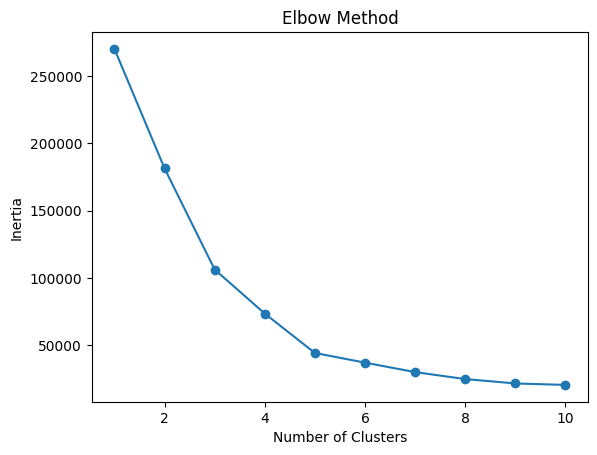

In [11]:
# Memplot inersia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [16]:
# Import Library
import cv2 as cv
import numpy as np
from minisom import MiniSom
from PIL import Image

In [17]:
image_path = "dataset/penguin.png"
img = Image.open(image_path)
img_data = np.asarray(img)
img_data = img_data / 255.0  # Normalize pixel values to [0, 1]

In [18]:
flat_img_data = img_data.reshape(-1, 3)

In [19]:
som_dim = 10  
som = MiniSom(som_dim, som_dim, 3, sigma=0.3, learning_rate=0.5)

In [20]:
som.train_random(flat_img_data, 100)
segmented_img = np.zeros_like(flat_img_data)

In [21]:
for i, x in enumerate(flat_img_data):
    winner = som.winner(x)
    weights = som.get_weights()[winner[0], winner[1]]
    segmented_img[i] = weights

In [22]:
segmented_img = segmented_img.reshape(img_data.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


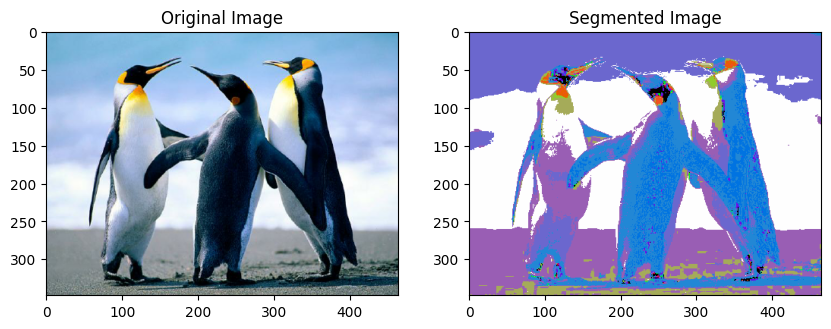

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()